# Part I - Ford Gobike Data Exploration
## by (Micheal Acquah)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#Uni">Univariate Exploration</a></li>
<li><a href="#Bi">Bivariate Exploration</a></li>
<li><a href="#Multi">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction
* **Ford GoBike System Data:** 
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='wrangling'></a>
## Preliminary Wrangling

### Gathering

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

%matplotlib inline 

In [2]:
# read data_set and make copy to save it 
B_df = pd.read_csv("./201902-fordgobike-tripdata.csv")
B_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### First Assessments

In [3]:
B_df.sample(31)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
143041,540,2019-02-07 16:19:05.2230,2019-02-07 16:28:05.6470,58.0,Market St at 10th St,37.776619,-122.417385,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4452,Subscriber,1992.0,Female,No
165649,461,2019-02-05 05:53:51.0830,2019-02-05 06:01:32.8030,370.0,Jones St at Post St,37.787327,-122.413278,26.0,1st St at Folsom St,37.787290,-122.394380,5173,Subscriber,1990.0,Male,No
23301,797,2019-02-25 20:48:34.7520,2019-02-25 21:01:52.3550,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,114.0,Rhode Island St at 17th St,37.764478,-122.402570,2614,Customer,1990.0,Male,No
29080,969,2019-02-25 07:48:15.6700,2019-02-25 08:04:25.4940,116.0,Mississippi St at 17th St,37.764802,-122.394771,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5229,Subscriber,1988.0,Female,No
140843,539,2019-02-07 18:34:19.3690,2019-02-07 18:43:18.5520,61.0,Howard St at 8th St,37.776513,-122.411306,369.0,Hyde St at Post St,37.787349,-122.416651,4610,Subscriber,1981.0,Male,No
7068,151,2019-02-28 09:29:24.0040,2019-02-28 09:31:55.2850,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,160.0,West Oakland BART Station,37.805318,-122.294837,5702,Subscriber,1987.0,Male,No
117558,371,2019-02-11 21:13:23.6850,2019-02-11 21:19:35.3970,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,1101,Subscriber,1974.0,Female,Yes
159388,671,2019-02-05 17:58:32.3340,2019-02-05 18:09:43.3590,107.0,17th St at Dolores St,37.763015,-122.426497,145.0,29th St at Church St,37.743684,-122.426806,4877,Subscriber,1994.0,Male,No
1005,567,2019-02-28 19:52:18.2560,2019-02-28 20:01:45.7020,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,124.0,19th St at Florida St,37.760447,-122.410807,4730,Subscriber,1969.0,Male,No
129320,310,2019-02-10 10:53:38.2550,2019-02-10 10:58:48.3670,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,90.0,Townsend St at 7th St,37.771058,-122.402717,1653,Subscriber,1990.0,Female,No


In [4]:
B_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
B_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
B_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Assessment observations

- Some rows have missing values
- Some columns have data types that are not appropriate, including `start_time`,`end_time`,`start_station_id`,`end_station_id`,`bike_id`,`member_gender`,`user_type`,`bike_share_for_all_trip`,`member_birth_year`.
- It seems necessary to add additional columns to the dataset in order to facilitate better analysis.

### First Cleaning

In [7]:
#making a copy
df = B_df.copy()

###### Define
1. Remove rows with missing values
2. Convert the data type of the following columns to the appropriate data type:`start_time`,`end_time`,`start_station_id`,`end_station_id`,`bike_id`,`member_gender`,`user_type`,`bike_share_for_all_trip`,`member_birth_year`.
3. Create new columns for `start date`, `start weeekday`, `Start hour`, `start month`, `members age` and `distance covered`
4. Remove unnecessary columns

In [8]:
# Drop missing values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# Changing data type .
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] =  df['start_station_id'].astype(str)
df['end_station_id'] =  df['end_station_id'].astype(str)
df['bike_id'] =  df['bike_id'].astype(str)
df['member_gender'] =  df['member_gender'].astype('category')
df['user_type'] =  df['user_type'].astype('category')
df['bike_share_for_all_trip'] =  df['bike_share_for_all_trip'].astype('category')
df['member_birth_year'] =  df['member_birth_year'].astype(int)

In [11]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
dtype: object

In [12]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60

In [13]:
#Start date
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_date'] = pd.to_datetime(df['start_date'])

In [14]:
# Start time hour
df['start_hour'] = df.start_time.dt.strftime('%H')

In [15]:
# Start time weekday
df['start_weekday'] = df['start_time'].dt.strftime('%A')

In [16]:
# Start time month (January - December)
df['start_month'] = df['start_time'].dt.strftime('%B')

In [17]:
# member age
df['member_age'] = 2019 - df.member_birth_year
df['member_age'] = df['member_age'].astype(int)

In [18]:
# Generate distance Travelled in kilometers
#vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
        
        a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))


# Kilometers covered 
df['dist'] = \
haversine(df.start_station_latitude, df.start_station_longitude,
             df.end_station_latitude, df.end_station_longitude)

In [19]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour,start_weekday,start_month,member_age,dist
16729,193,2019-02-27 08:16:01.404,2019-02-27 08:19:15.002,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,171.0,Rockridge BART Station,37.844279,...,1965,Other,No,3.216667,2019-02-27,08,Wednesday,February,54,0.791015
156551,346,2019-02-06 07:49:47.508,2019-02-06 07:55:34.329,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,245.0,Downtown Berkeley BART,37.870139,...,1996,Male,No,5.766667,2019-02-06,07,Wednesday,February,23,1.212108
85915,556,2019-02-17 14:02:47.729,2019-02-17 14:12:04.277,73.0,Pierce St at Haight St,37.771793,-122.433708,356.0,Valencia St at Clinton Park,37.769188,...,1988,Other,No,9.266667,2019-02-17,14,Sunday,February,31,1.044977
159450,217,2019-02-05 18:02:45.994,2019-02-05 18:06:23.466,163.0,Lake Merritt BART Station,37.797320,-122.265320,372.0,Madison St at 17th St,37.804037,...,1983,Male,No,3.616667,2019-02-05,18,Tuesday,February,36,0.789491
76478,1169,2019-02-19 08:06:40.142,2019-02-19 08:26:09.174,160.0,West Oakland BART Station,37.805318,-122.294837,157.0,65th St at Hollis St,37.846784,...,1981,Male,No,19.483333,2019-02-19,08,Tuesday,February,38,4.620804


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [21]:
#Removing unwanted columns
df = df.drop(['start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
              'end_station_id','end_station_latitude','end_station_longitude','member_birth_year'], axis=1)

In [22]:
df.columns.values.tolist()

['duration_sec',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_min',
 'start_date',
 'start_hour',
 'start_weekday',
 'start_month',
 'member_age',
 'dist']

### Second Assessment

In [23]:
df.sample(31)

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour,start_weekday,start_month,member_age,dist
110336,388,Almaden Blvd at Balbach St,San Jose Diridon Station,471,Subscriber,Male,No,6.466667,2019-02-12,18,Tuesday,February,24,1.155304
107733,282,San Pedro Square,San Jose City Hall,2334,Subscriber,Male,No,4.700000,2019-02-13,14,Wednesday,February,40,0.630680
59063,186,Mississippi St at 17th St,22nd St Caltrain Station,4717,Subscriber,Male,No,3.100000,2019-02-20,21,Wednesday,February,31,0.869039
2524,389,Rockridge BART Station,Shattuck Ave at 55th St,5118,Subscriber,Female,No,6.483333,2019-02-28,18,Thursday,February,43,1.187948
156816,146,Broadway at Battery St,Clay St at Battery St,1497,Subscriber,Male,No,2.433333,2019-02-06,07,Wednesday,February,33,0.404869
9152,274,Townsend St at 7th St,Berry St at 4th St,5736,Subscriber,Male,No,4.566667,2019-02-28,07,Thursday,February,27,0.995791
74233,429,Shattuck Ave at Hearst Ave,Bancroft Way at Telegraph Ave,6421,Subscriber,Male,No,7.150000,2019-02-19,11,Tuesday,February,55,1.010388
18308,593,University Ave at Oxford St,Milvia St at Derby St,4661,Subscriber,Male,No,9.883333,2019-02-26,18,Tuesday,February,53,1.384247
26050,1258,Laguna St at Hayes St,Grove St at Divisadero,6352,Customer,Female,No,20.966667,2019-02-25,13,Monday,February,62,1.015128
179030,405,San Francisco Caltrain (Townsend St at 4th St),Folsom St at 3rd St,4744,Subscriber,Male,No,6.750000,2019-02-01,15,Friday,February,30,0.863776


In [24]:
df.describe()

,duration_sec,duration_min,member_age,dist
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,11.733379,34.196865,1.690049
std,1642.204905,27.370082,10.118731,1.096957
min,61.000000,1.016667,18.000000,0.000000
25%,323.000000,5.383333,27.000000,0.910443
50%,510.000000,8.500000,32.000000,1.429829
75%,789.000000,13.150000,39.000000,2.224010
max,84548.000000,1409.133333,141.000000,69.469241


In [25]:
print('Duration Hour', (1386/60))

Duration Hour 23.1


* _Riding for about 23 hours seems very unusual_
* _Riding at age 119 also seems very unsusual_

In [26]:
len(df[df['duration_min'] > 65])

1234

In [27]:
len(df[df['member_age'] > 70])

575

### Second Cleaning

In [28]:
# Droping unusual value to prevent outliers
df.drop(df.index[df['member_age'] > 70], inplace=True)
df.drop(df.index[df['duration_min'] > 65], inplace=True)

In [29]:
len(df[df['duration_min'] > 65])

0

In [30]:
len(df[df['member_age'] > 70])

0

In [31]:
df.shape

(173146, 14)

In [32]:
# Storing cleaned data for future use
df.to_csv("fordgobike-tripdata_cleaned.csv", index=False)

### Structure of your dataset?

- The dataset originally contains 14647 Ford GoBike rides with 16 characteristics (`duration_sec, start_time, end_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip`).

- After Prelimary wrangling this dataset now contains 13974 Ford GoBike rides with 14 charateristics for each individual rides (`duration_sec`, `start_station_name`, `end_station_name`, `bike_id`, `user_type`, `member_gender`, `bike_share_for_all_trip`, `duration_min`, `start_date`, `start_hour`, `start_weekday`, `start_month`, `end_month`, `member_age`, `dist`)


### Main feature(s) of interest in dataset?

- I'm Iintereste trip duration and distance traveled and determining how other dataset characteristics such as age, user type, and gender effect the trip duration and distance traveled.

### Features in the dataset that will help support investigation of interest?

- `start_station_name`, `user_type`, `member_gender`, `start_date`, `start_hour`, `start_weekday`, `member_age`, `duration_min` and `distance`


<a id='Uni'></a>
## Univariate Exploration

In this section, I investigate the distributions of individual variables of interest. 

In [33]:
# setting color pattern 
c = sb.color_palette()[0]

### What were the most popular Start Station?

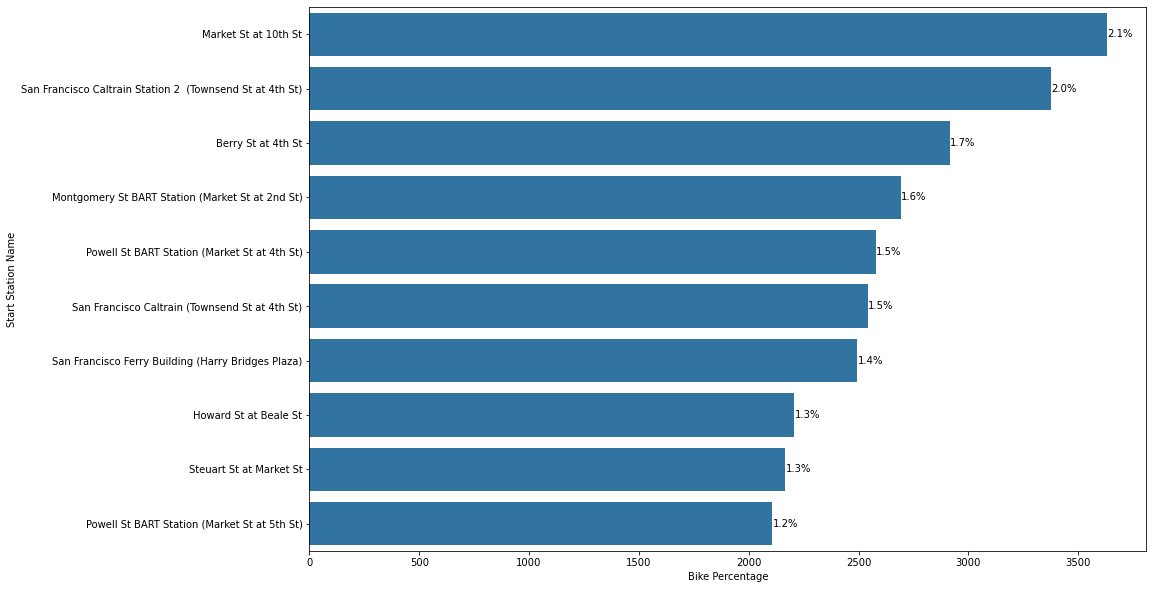

In [34]:
top_station = df.start_station_name.value_counts().head(10)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
o = top_station.index
sb.countplot(data=df , y='start_station_name' , color=c , order=o);

# Putting percentage  
for i in range(top_station.shape[0]):
    count = top_station[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(count+1, i, pct_string, va = 'center');
    
plt.ylabel('Start Station Name')
plt.xlabel('Bike Percentage');

**Observation**
- The top two popular start stations were `Market St at 10th St` and `San Francisco Caltrain Station 2 (Townsend St at 4th St) `.

### What is the distribution of user type ?

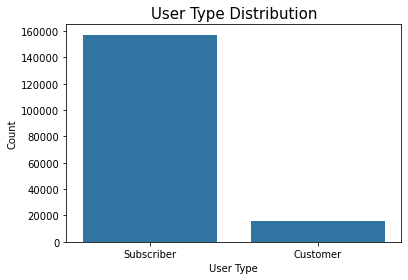

In [35]:
# Gender data 
o = df.user_type.value_counts().index
User =df.user_type.value_counts()
sb.countplot(data=df , x='user_type' , color= c , order=o);
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type Distribution', fontsize = 15);

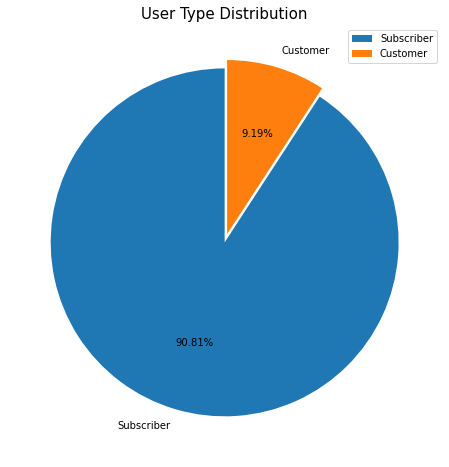

In [36]:
User.plot.pie(figsize=(8,8),autopct='%.2f%%', startangle=90, explode=(0,.05))
plt.title('User Type Distribution', fontsize = 15)
plt.legend(["Subscriber", "Customer"])
plt.xlabel('')
plt.ylabel('');

**Observation**
> Most of the users of this system were subscribers making up 90.81% of the users

### What is the distribution of member's gender ?

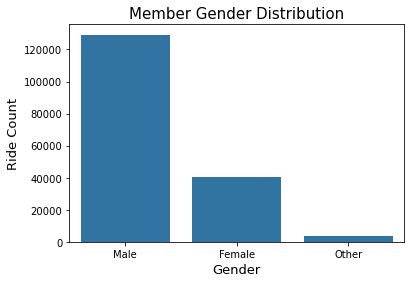

In [37]:
# Gender data 
Gender = df.member_gender.value_counts()
o = Gender.index
sb.countplot(data=df , x='member_gender' , color= c , order=o);
plt.title('Member Gender Distribution', fontsize = 15)
plt.xlabel('Gender',fontsize = 13)
plt.ylabel('Ride Count',fontsize = 13);

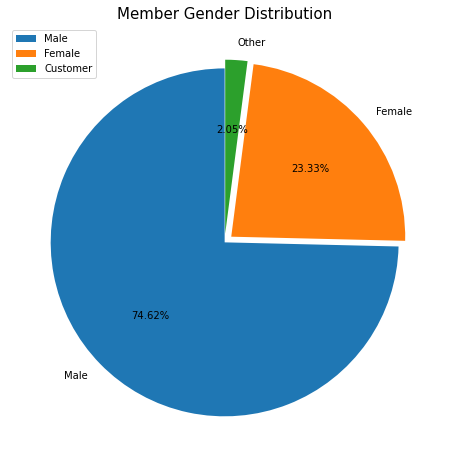

In [38]:
Gender.plot.pie(figsize=(8,8),autopct='%.2f%%', startangle=90, explode=(0,.05,.05));
plt.title('Member Gender Distribution', fontsize = 15)
plt.legend(["Male","Female", "Customer"])
plt.xlabel('')
plt.ylabel('');

**Observation**
> Most of the users of this system were males, making up 74.75% of the users

### How often were the bike shared ?

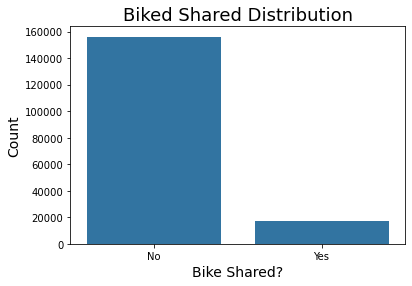

In [39]:
sb.countplot(data=df , x='bike_share_for_all_trip' , color= c);
plt.title('Biked Shared Distribution', fontsize = 18)
plt.xlabel('Bike Shared?', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

**Observation**
> The bike wasn't shared most of the time

### What is the distribution for duration of the rides (in minutes)?

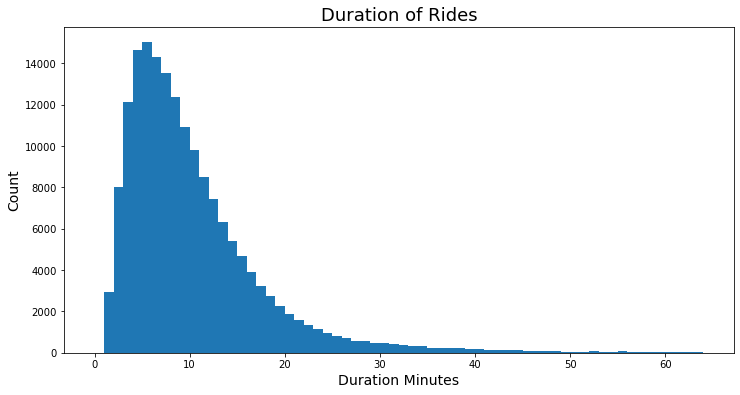

In [40]:
bin_edges = np.arange(0,65,1)
plt.figure(figsize=(12,6))
plt.hist(data = df, x = 'duration_min', bins = bin_edges);
plt.title('Duration of Rides', fontsize = 18)
plt.xlabel('Duration Minutes', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

**Observation**
> Distribution for duration minutes is rightly skewed. With most rider lasting for about 5mins

### What is the distribution rides across the hours of the day?

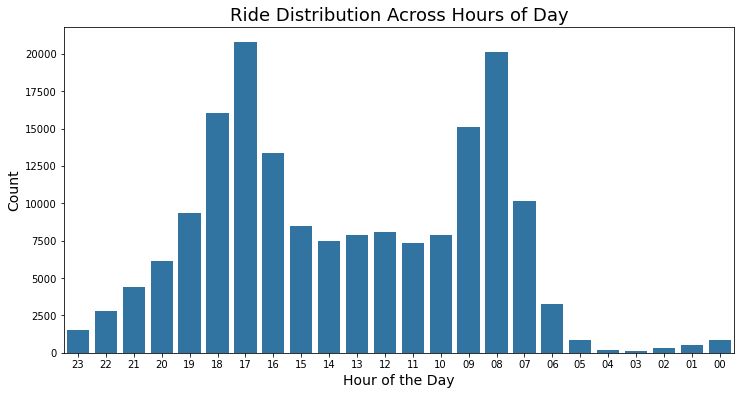

In [41]:
plt.figure(figsize=(12,6))
sb.countplot(data=df , x='start_hour' , color= c );
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Ride Distribution Across Hours of Day', fontsize = 18);

**Observation**
> The most usage during the morning was around the hours of 8-9am, and in the afternoon was around the hours of 5-6pm.
>Generally it seems most rides started around 5pm

### Which days of the week had most rides?

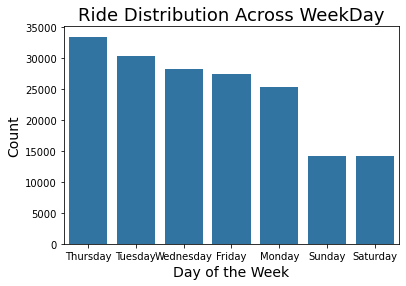

In [42]:
o = df.start_weekday.value_counts().index
sb.countplot(data=df , x='start_weekday' , color= c , order=o);
plt.title('Ride Distribution Across WeekDay', fontsize = 18)
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

In [43]:
df.start_weekday.value_counts()

Thursday     33436
Tuesday      30370
Wednesday    28207
Friday       27407
Monday       25340
Sunday       14207
Saturday     14179
Name: start_weekday, dtype: int64

**Observation**
>  Interestly, it seems most rides occurred on Thursdays followed by Tuesday

### What is the distribution across months?

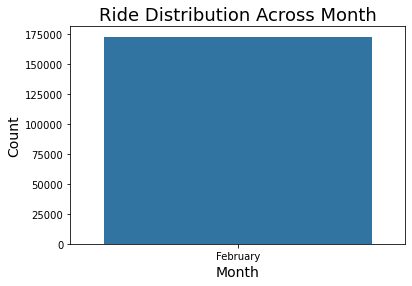

In [44]:
sb.countplot(data=df , x='start_month' , color= c );
plt.title('Ride Distribution Across Month', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

In [45]:
len(df[df['start_month'] != 'February'])

0

**Observation**
> All rides started in February

### What is the distribution across different ages?

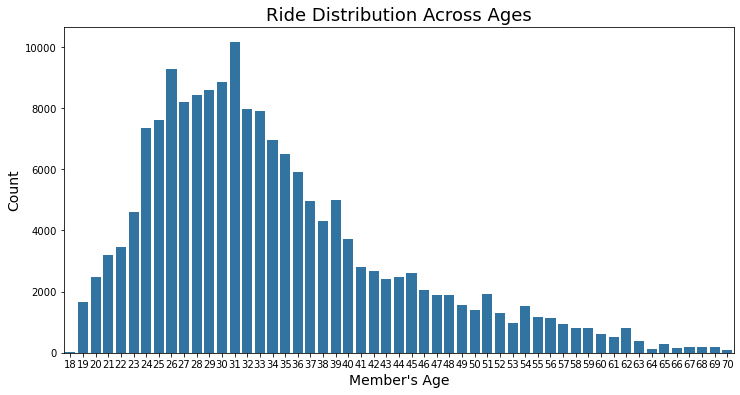

In [46]:
plt.figure(figsize=(12,6))
sb.countplot(data = df, x = 'member_age', color = c);
plt.title('Ride Distribution Across Ages', fontsize = 18)
plt.xlabel("Member's Age", fontsize = 14)
plt.ylabel('Count', fontsize = 14);


**Observation**
> The age with the most riders is age 31

### What is the distribution for Distanced Traveled?

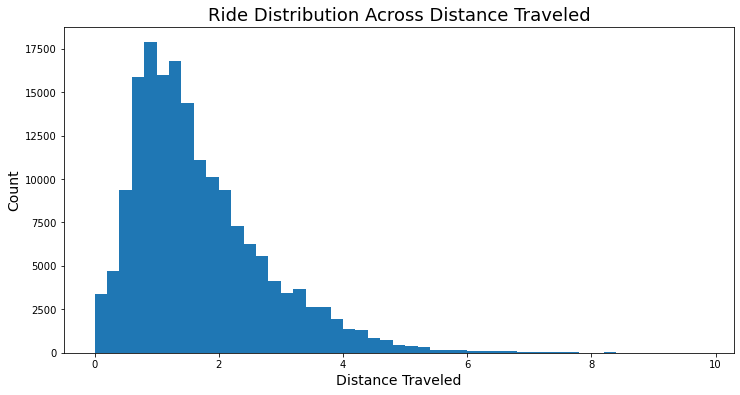

In [47]:
bin_edges = np.arange(0,10,.2)
plt.figure(figsize=(12,6))
plt.hist(data = df, x = 'dist', bins = bin_edges);
plt.title('Ride Distribution Across Distance Traveled', fontsize = 18)
plt.xlabel('Distance Traveled', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

**Observation**
> Distribution for distance traveled is rightly skewed. It also seems that the distance that was traveled the most is around 1km

### General observations from Univariante Visualisations

> Thanks to the cleaning process done earlier, discovering the parameter distributions was relatively easy with none of the distributions unsually standing out.

<a id='Bi'></a>
## Bivariate Exploration

> In this section,I will investigate relationships between pairs of variables in the data.

### What is the relationship between User Type and Member's Gender?

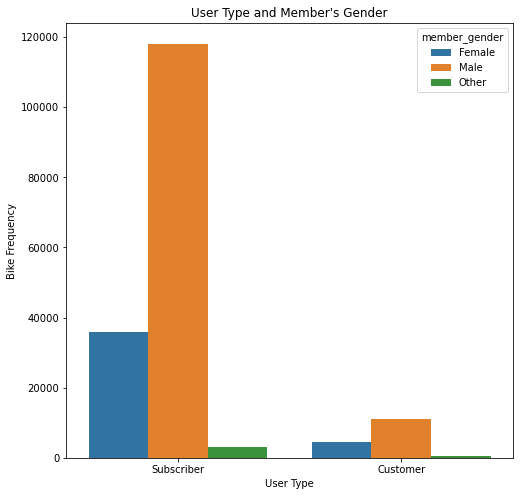

In [48]:
sb.countplot(data=df, x="user_type",  hue="member_gender", order=df.user_type.value_counts().index)
plt.gcf().set_size_inches(8,8)
plt.title("User Type and Member's Gender");
plt.xlabel("User Type")
plt.ylabel('Bike Frequency');

**Observation**
> Even across genders subscribers seem to be more than customers.
It can also observed that a very large amount of riders are male susbribers.

### What is the relationship between User Type and Start Hour?

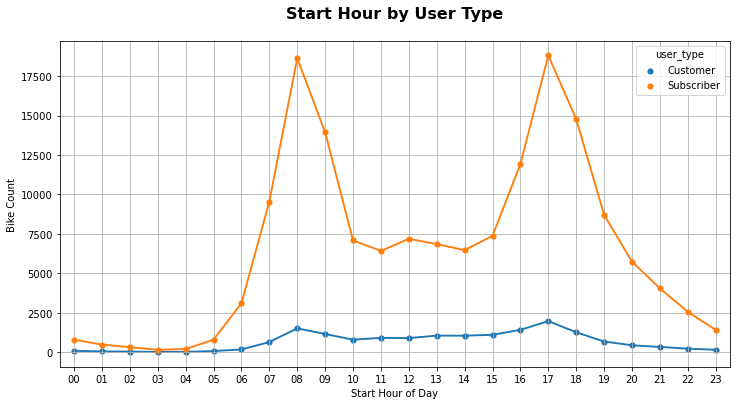

In [49]:
plt.figure(figsize = [12, 6]);
user_hour = df.groupby(['start_hour', 'user_type']).size().reset_index()
sb.pointplot(data=user_hour, x= 'start_hour',y= 0, hue = 'user_type', scale=.7);
plt.title('Start Hour by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Start Hour of Day')
plt.ylabel('Bike Count');
plt.grid()

**Observation**
> Both Subscribers and Customers had most usuage around 5pm

### What is the relationship between User Type and Member's Age?

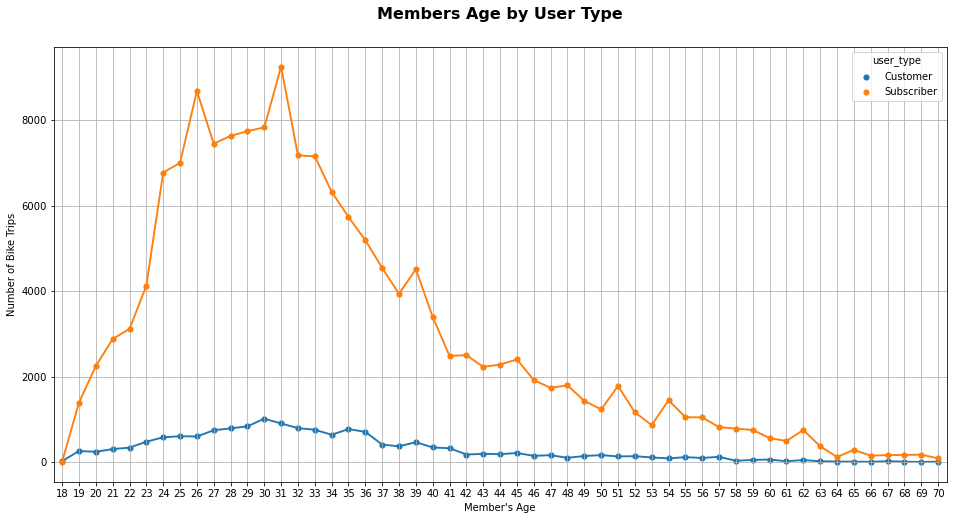

In [50]:
plt.figure(figsize = [16, 8]);
user_hour = df.groupby(['member_age', 'user_type']).size().reset_index()
sb.pointplot(data=user_hour, x= 'member_age',y= 0, hue = 'user_type', scale=.7);
plt.title('Members Age by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel("Member's Age")
plt.ylabel('Number of Bike Trips');
plt.grid()

**Observation**
> Among customers, those of the age 30 had the most number  while for subsribers the age with the highest number is 31.

> Interestly it seems for both User Types, most member were less than 40.

## _Trip Duration_

### What is the relationship between User Type and Ride Duration?

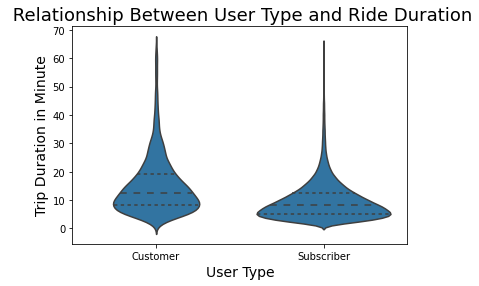

In [51]:
sb.violinplot(data=df, x='user_type', y='duration_min', color = c, inner='quartile');
plt.title(' Relationship Between User Type and Ride Duration', fontsize = 18)
plt.xlabel('User Type', fontsize = 14);
plt.ylabel('Trip Duration in Minute', fontsize = 14);

<Figure size 864x720 with 0 Axes>

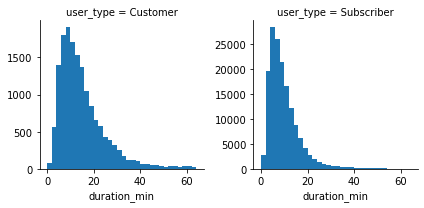

In [52]:
bin_edges = np.arange(0, 65,2)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'user_type', sharey= False )
g.map(plt.hist, 'duration_min', bins = bin_edges );

**Observation**
>It seems subscribers tend to have shorter trips compared to customers

### What is the relationship between Week Day and Ride Duration?

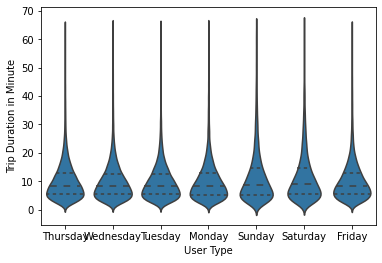

In [53]:
sb.violinplot(data=df, x='start_weekday', y='duration_min', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

**Observation**
>It seems the duration of the rides on across days seem very similar

### What is the relationship between Member's Gender and Ride Duration?

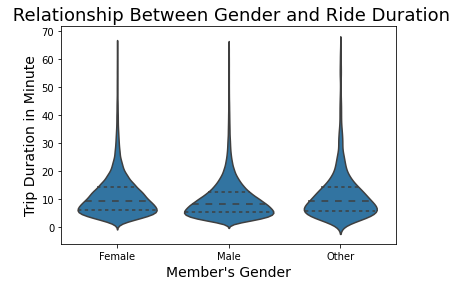

In [54]:
sb.violinplot(data=df, x='member_gender', y='duration_min', color = c, inner='quartile');
plt.title(' Relationship Between Gender and Ride Duration', fontsize = 18)
plt.xlabel("Member's Gender", fontsize = 14);
plt.ylabel('Trip Duration in Minute', fontsize = 14);

<Figure size 864x720 with 0 Axes>

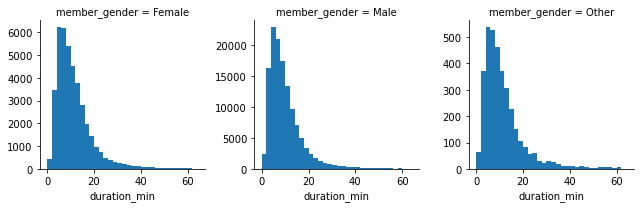

In [55]:
bin_edges = np.arange(0, 65,2)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'member_gender', sharey= False );
g.map(plt.hist, 'duration_min', bins = bin_edges );

**Observation**
>Though not a huge difference, male riders tend to have shorter trips as compared to female users.

### What is the relationship between Member's Age and Ride Duration?

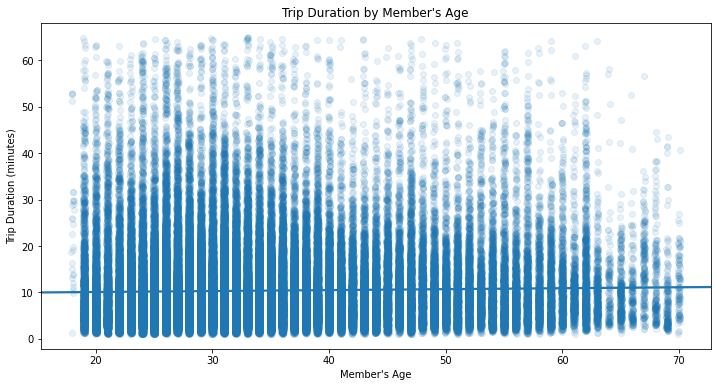

In [56]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'member_age', y = 'duration_min', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.ylabel('Trip Duration (minutes)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

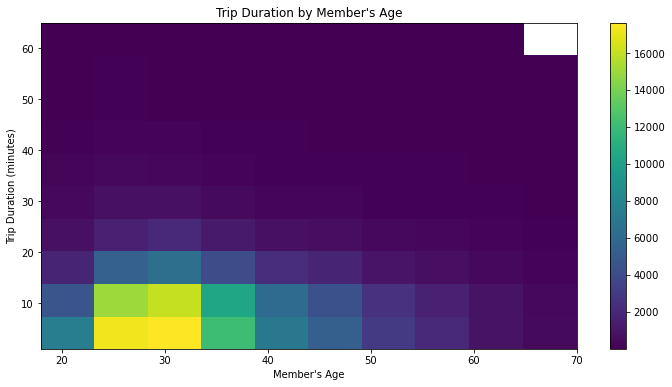

In [57]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'member_age', y = 'duration_min', cmin =.5)
plt.colorbar()
plt.ylabel('Trip Duration (minutes)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

In [58]:
print((len(df[df['member_age'] < 40])/len(df['member_age']) * 100),'%')

77.0511591373754 %


**Observation**
> As observed above, a large percent of riders are less than age 40 and very interestly most of them spend less than 20 minutes on rides

## _Distance Traveled_

### What is the relationship between User Type and Distrance Traveled?

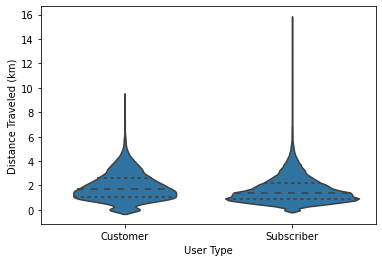

In [59]:
sb.violinplot(data=df, x='user_type', y='dist', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Distance Traveled (km)');

**Observation**
>It seems subscribers tend to traveled shorter distance as compared to customers.

### What is the relationship between Start Week Day and Distrance Traveled?

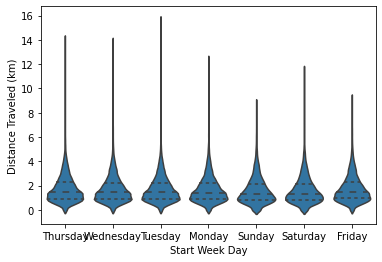

In [60]:
sb.violinplot(data=df, x='start_weekday', y='dist', color = c, inner='quartile');
plt.xlabel('Start Week Day');
plt.ylabel('Distance Traveled (km)');

**Observation**
> It seems Thuesday distance travel is th highest 

### What is the relationship between Member's Gender and Distrance Traveled?

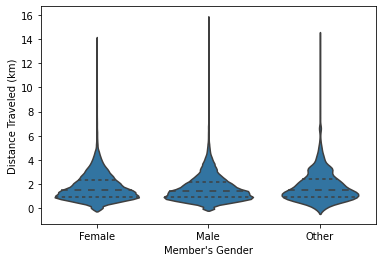

In [61]:
sb.violinplot(data=df, x='member_gender', y='dist', color = c, inner='quartile');
plt.xlabel("Member's Gender");
plt.ylabel('Distance Traveled (km)');

<Figure size 864x720 with 0 Axes>

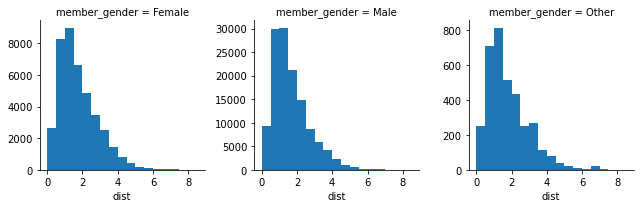

In [62]:
bin_edges = np.arange(0,9,.5)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'member_gender', sharey= False );
g.map(plt.hist, 'dist', bins = bin_edges );

**Observation**
>It seems more males travel slightly more distance

### What is the relationship between Member's Age and Distrance Traveled?

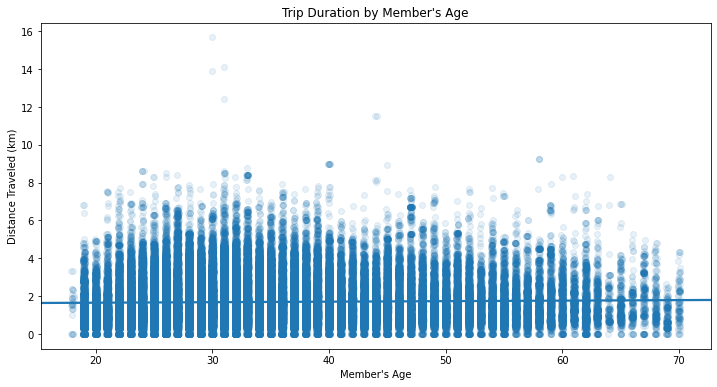

In [63]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'member_age', y = 'dist', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.ylabel('Distance Traveled (km)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

In [64]:
df['dist'].corr(df['member_age'])

0.024558755841920292

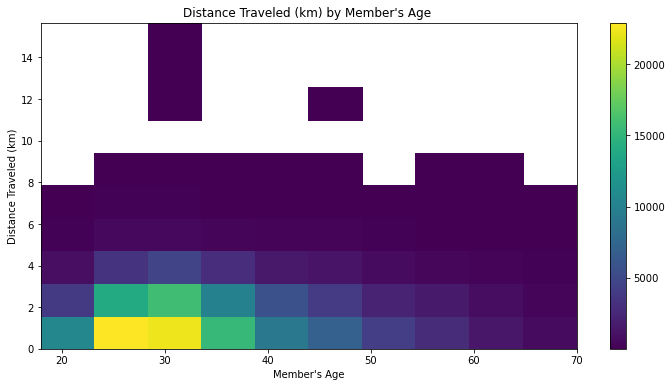

In [65]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'member_age', y = 'dist', cmin =.5)
plt.colorbar()
plt.title("Distance Traveled (km) by Member's Age ");
plt.ylabel('Distance Traveled (km)');
plt.xlabel("Member's Age");

**Observation**
>Most riders were of ages less than 40 and traveled distance less than 3km.

### What is the relationship between Ride Duration and Distrance Traveled?

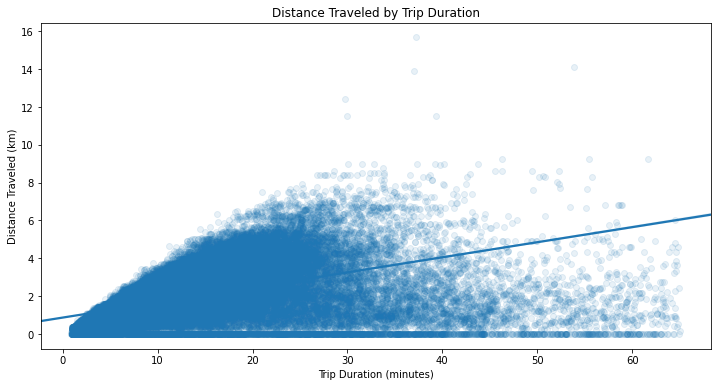

In [66]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'duration_min', y = 'dist', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.xlabel('Trip Duration (minutes)');
plt.ylabel('Distance Traveled (km)');
plt.title('Distance Traveled by Trip Duration');

In [67]:
df['dist'].corr(df['duration_min'])

0.5565993931122925

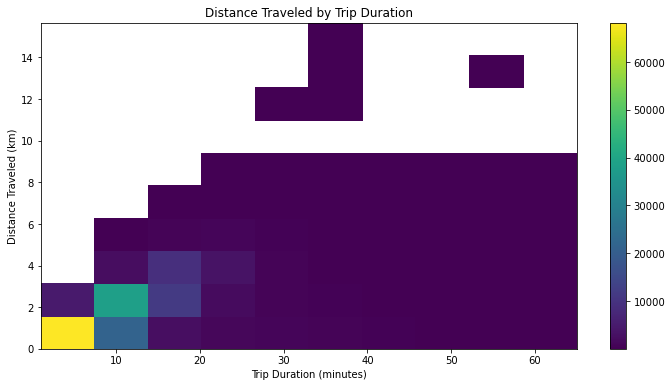

In [68]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.xlabel('Trip Duration (minutes)');
plt.ylabel('Distance Traveled (km)');
plt.title('Distance Traveled by Trip Duration');

**Observation**
>Distance travel and duration of rides are morderately correlated with the most number of rides taking less than 20mins and traveled less than 4km.
> It was only logical that riders who rode for a short time did not travel far. Surprisingly, those who traveled for the greatest periods of time failed to cover a particular distance.

### General observations from Bivariante Visualisations

> * It was noticed that the very large amount riders were under age 40
> * Interestly, for both user types, rides were highest around 5pm but age-wise, for Subscribers the most rides were done by those of age 31 while for customers those of age 30 had the most rides
> * Interestly, the distribution for Trip duration for males and females were quite similar with only slight differences
> * Also, the distribution for Distance traveled for males and females were quite similar with only slight differences
> * Logically,riders who rode for a short time did not travel far. 

<a id='Multi'></a>
## Multivariate Exploration

> In this section, I would be creating plots of three variables to investigate my data set even
further.

### What is the relationship between Ride Duration and Distrance Traveled for each User Type?

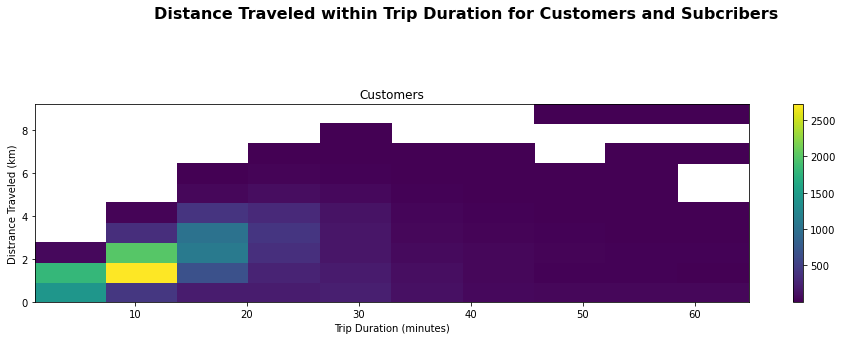

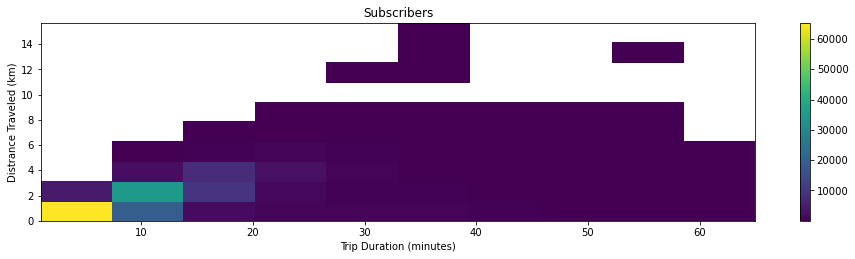

In [69]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
plt.hist2d(data = customers, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Customers');

plt.suptitle('Distance Traveled within Trip Duration for Customers and Subcribers', y=1.05, fontsize=16, fontweight='bold');

plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Subscriber = df.query('user_type == "Subscriber"')
plt.hist2d(data = Subscriber, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Subscribers');

_**Observation**_
> Each user type had most members traveling around the same duration and distance

### What is the relationship between Ride Duration and Distrance Traveled for each Gender?

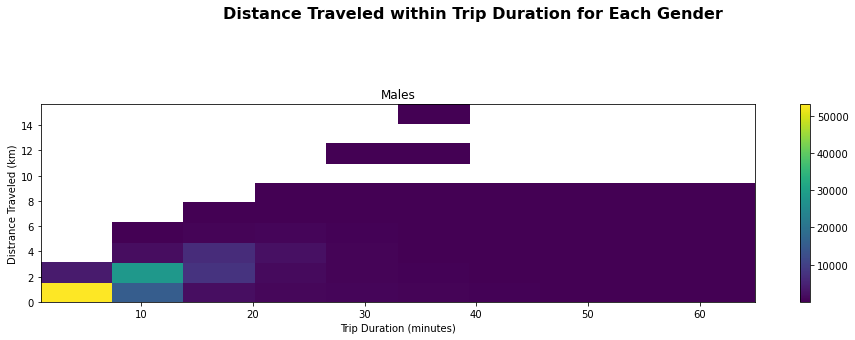

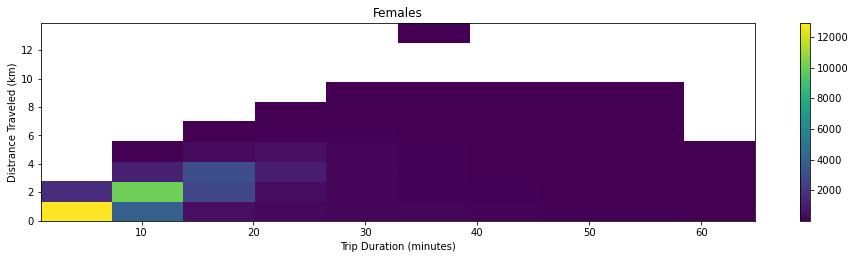

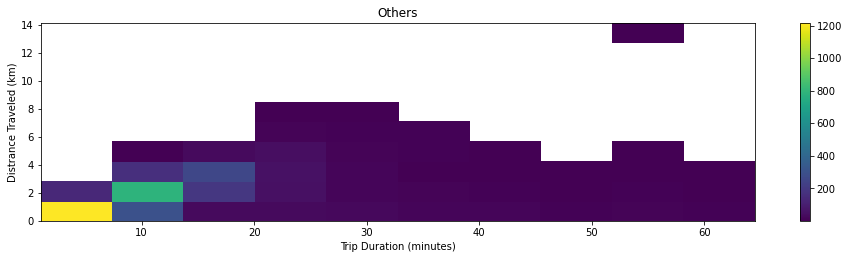

In [70]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Male = df.query('member_gender == "Male"')
plt.hist2d(data = Male, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Males');

plt.suptitle('Distance Traveled within Trip Duration for Each Gender', y=1.05, fontsize=16, fontweight='bold');

plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Female = df.query('member_gender == "Female"')
plt.hist2d(data = Female, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Females');


plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Other = df.query('member_gender == "Other"')
plt.hist2d(data = Other, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Others');

**Observation**_
> Most members of each gender traveled for around the same number of duration and distance though the is quite a difference in the distribution of the gender `Others`.

### What is the relationship between Ride Duration and Distrance Traveled across Member's Ages?

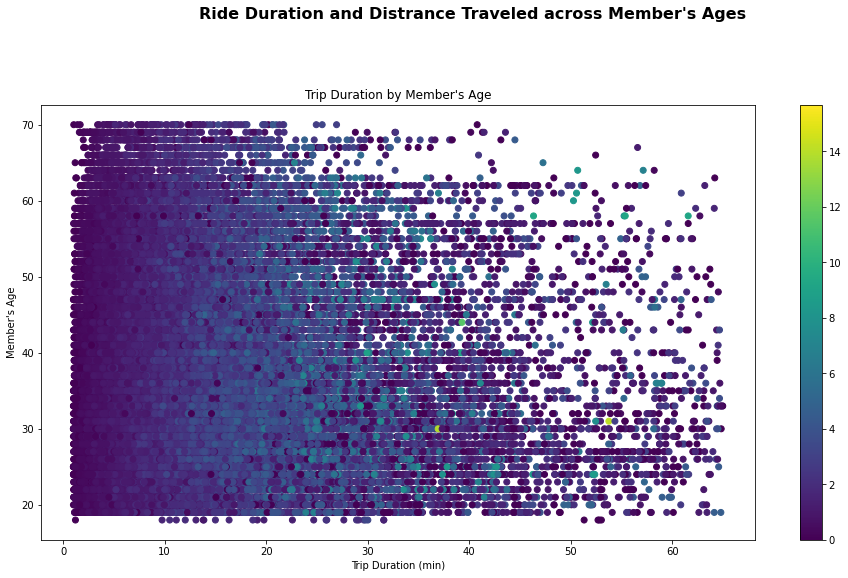

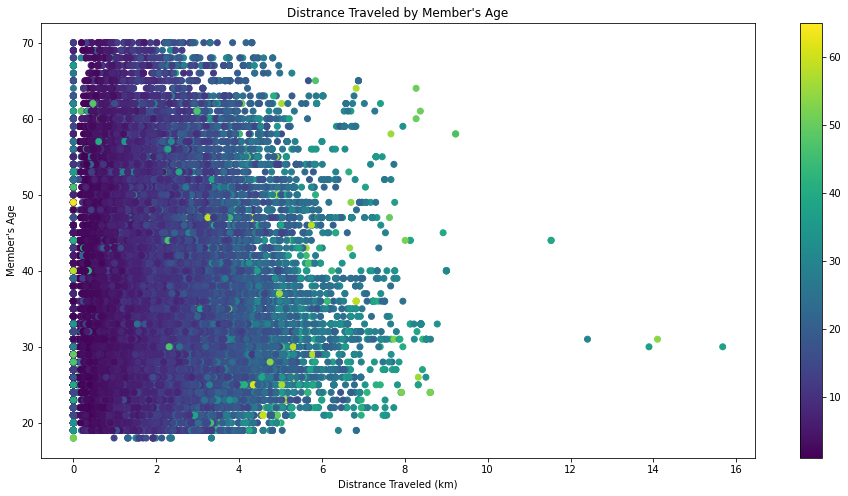

In [71]:
plt.subplot
plt.figure(figsize = (16,8));
plt.scatter(data = df, c = 'dist', y = 'member_age', x = 'duration_min');
plt.colorbar();
plt.xlabel("Trip Duration (min)");
plt.ylabel("Member's Age");
plt.title("Trip Duration by Member's Age");

plt.suptitle("Ride Duration and Distrance Traveled across Member's Ages", y=1.05, fontsize=16, fontweight='bold');

plt.subplot
plt.figure(figsize = (16,8));
plt.scatter(data = df, x = 'dist', y = 'member_age', c = 'duration_min');
plt.colorbar();
plt.xlabel("Distrance Traveled (km)");
plt.ylabel("Member's Age");
plt.title("Distrance Traveled by Member's Age");

_**Observation**_
> It can be observe that rider around the ages of 60 to 70 didn't travel very far distances though a some traveled for long

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Distance Travel and Trip Duration is very similar across gender and user types
> Age-wise it seem over 60 didn't travel pass some minutes or distance

<a id='conclusion'></a>
## Conclusions
- The two days with most rides were Thursdays followed by Tuesday though it seems some people who rode on Tuesdays traveled futher distance than those on Thursdays. 
- The analysis revealed that a large proportion of the riders were under the age of 40, which is expected as individuals in this age group are typically healthier and more physically active.
- Regardless of their gender or user type, most riders covered similar distances and rode for similar durations, which is an interesting finding.
- Given that bikes are not typically used for long distance travel, it is not surprising that the majority of rides were less than 2 km and lasted less than 20 minutes. However, it was surprising to see that those who traveled for the longest durations did not cover the greatest distances.
- The majority of riders were male, and most users were subscribers, which is not unexpected.
- The fact that most rides occurred during rush hour (8am-9am and 5pm-6pm) is also unsurprising.
- Gender and user type did not appear to have a significant impact on distance traveled or trip duration.
- It was observed that individuals over the age of 60 tended to travel for shorter periods of time and cover less distance, indicating that they may not be using the bikes for commuting or exercise purposes.